# Analyse Numérique 1

In [1]:
%matplotlib inline
from matplotlib import pyplot as plt
import numpy as np

## définition des fonctions f et f'

In [2]:
def f(x):
    return 3*x*x-2

In [3]:
def f_prime(x):
    return 6*x

## fonction pour tracer la courbe

In [67]:
def trace(f,a,b): 
    """
    Trace la fonction f sur l'interval [a,b]
    """
    x = np.linspace(a,b,100) # créer 100 points répartis uniforméments sur l'interval a b

    fig = plt.figure()
    ax = fig.add_subplot(1, 1, 1)
    
    # Trace les axes relativements aux données
    ax.spines['left'].set_position(('data', 0.0))
    ax.spines['bottom'].set_position(('data', 0.0))

    plt.plot(x,f(x))
    plt.show()

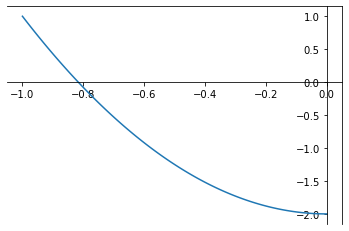

In [5]:
trace(f,-1,0)

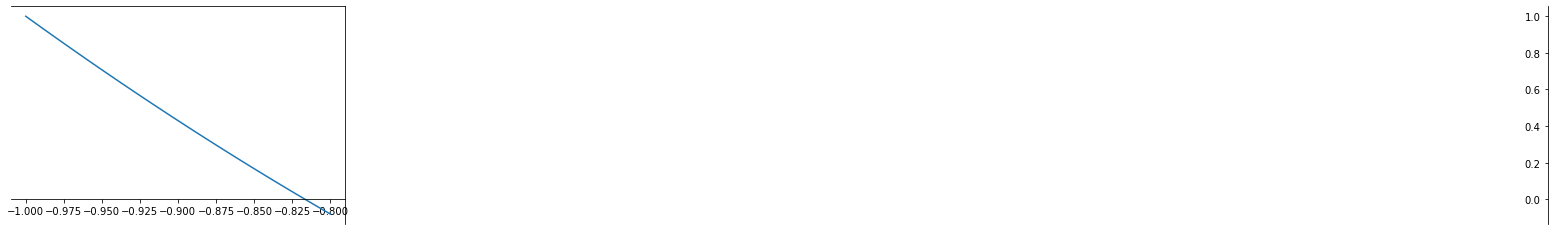

In [6]:
trace(f, -1, -0.8) # pour les axes, ça marche moyen

## Dichotomie

In [43]:
def dichotomie(a,b,epsilon, boucle = 0):
    """
    Retourne la valeur approchée(epsilon) d'un zéro présent dans l'intervalle [a, b]
    ainsi que le nombre d'étapes nécéssaires
    """
    if f(a)*f(b)>0:
        print("problème d'intervalle")
        return None 
    
    if abs(f(a)) > epsilon:
        if f(a) * f((a+b)/2) < 0:
            b = (a+b)/2
        else:
            a = (a+b)/2
        a, boucle = dichotomie(a, b, epsilon, boucle+1)
    return a, boucle

In [44]:
dichotomie(-1, 0, 10**-4)

(-0.816497802734375, 15)

__Calcul pour epsilon de 1 à 10^-10__

In [45]:
for i in range(10):
    print(f"ε = 10-{i} --> {dichotomie(-1,0,10**-i)}")

ε = 10-0 --> (-1, 0)
ε = 10-1 --> (-0.828125, 6)
ε = 10-2 --> (-0.818359375, 9)
ε = 10-3 --> (-0.816650390625, 12)
ε = 10-4 --> (-0.816497802734375, 15)
ε = 10-5 --> (-0.816497802734375, 15)
ε = 10-6 --> (-0.8164966106414795, 22)
ε = 10-7 --> (-0.8164965957403183, 26)
ε = 10-8 --> (-0.8164965827018023, 29)
ε = 10-9 --> (-0.8164965810719877, 32)


et sa courbe jusqu'à $ \epsilon = 10^{-15}$

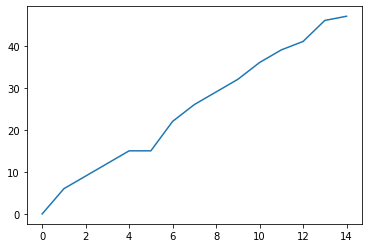

In [46]:
plt.plot(range(15), [dichotomie(-1,0,10**-i)[1] for i in range(15)])
plt.show()

Si on pousse plus loin dans la précision, le programme plante.
Ce qui nous rappelle qu'il faut se méfier lorsque l'on travail sur des nombres décimaux.  
Voir l'article suivant dans le manuel python : https://docs.python.org/fr/3.8/tutorial/floatingpoint.html  
Il faut sans doute utiliser des bibliotheques dédiée pour travailler en haute précision.

In [47]:
dichotomie(-1,0,10**-20)

RecursionError: maximum recursion depth exceeded

__Si on veut tracer les points intermédiaires__  
On redefinie la fontion dichotomie, et on renvoie la valeur approchée ainsi que le tableau correspondant aux différentes valeurs évaluées.

In [49]:
def dichotomie(a, b, epsilon, steps = []):
    """
    retourne le zéro +/- epsilon, et un tableau avec les différentes étapes
    """
    steps += [(a+b)/2]
    if f(a)*f(b)>0:
        print("problème d'intervalle")
        return None 
    if (abs(f(a))>epsilon):
        if f(a)*f((a+b)/2)<0 :
            b=(a+b)/2
        else:
            a=(a+b)/2
        a,steps = dichotomie(a,b,epsilon, steps)
    return a, steps

In [50]:
dichotomie(-1,0,10**-4)

(-0.816497802734375,
 [-0.5,
  -0.75,
  -0.875,
  -0.8125,
  -0.84375,
  -0.828125,
  -0.8203125,
  -0.81640625,
  -0.818359375,
  -0.8173828125,
  -0.81689453125,
  -0.816650390625,
  -0.8165283203125,
  -0.81646728515625,
  -0.816497802734375,
  -0.8164825439453125])

Puis on trace la courbe plus les point intermédiaires.  
Le résultat est moyen, bof, bof

In [60]:
def trace(f,a,b, points=[]): 
    """
    Trace la fonction f sur l'interval [a,b]
    """
    x = np.linspace(a,b,100)

    fig = plt.figure()
    ax = fig.add_subplot(1, 1, 1)

    #ax.spines['left'].set_position(('data', 0.0))
    ax.spines['bottom'].set_position(('data', 0.0))

    plt.plot(x,f(x))
    if points:
        plt.plot(points, np.zeros(len(points)), '*')
    plt.show()

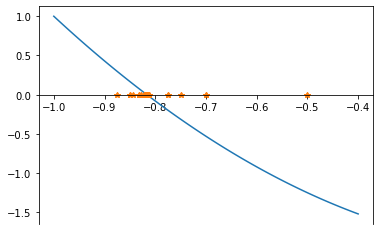

In [61]:
trace(f, -1, -0.4, dichotomie(-1,-0.4,10**-4)[1])

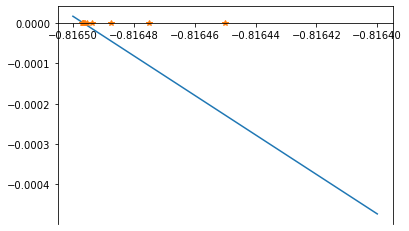

In [62]:
trace(f, -0.8165, -0.8164,dichotomie(-0.8165,-0.8164,10**-8,[])[1])

In [57]:
dichotomie(-0.8165,-0.8164,10**-8,[])

(-0.81649658203125,
 [-0.81645,
  -0.8164750000000001,
  -0.8164875,
  -0.81649375,
  -0.816496875,
  -0.8164953125000001,
  -0.8164960937500001,
  -0.816496484375,
  -0.8164966796875,
  -0.81649658203125,
  -0.816496533203125])

In [58]:
dichotomie(-1,0,10**-8)

(-0.8164965827018023,
 [-0.5,
  -0.75,
  -0.875,
  -0.8125,
  -0.84375,
  -0.828125,
  -0.8203125,
  -0.81640625,
  -0.818359375,
  -0.8173828125,
  -0.81689453125,
  -0.816650390625,
  -0.8165283203125,
  -0.81646728515625,
  -0.816497802734375,
  -0.8164825439453125,
  -0.7,
  -0.85,
  -0.7749999999999999,
  -0.8125,
  -0.83125,
  -0.821875,
  -0.8171875,
  -0.81484375,
  -0.8160156249999999,
  -0.8166015624999999,
  -0.8163085937499999,
  -0.816455078125,
  -0.8165283203125,
  -0.81649169921875,
  -0.816510009765625,
  -0.8165008544921875,
  -0.7,
  -0.85,
  -0.7749999999999999,
  -0.8125,
  -0.83125,
  -0.821875,
  -0.8171875,
  -0.81484375,
  -0.8160156249999999,
  -0.8166015624999999,
  -0.8163085937499999,
  -0.816455078125,
  -0.8165283203125,
  -0.81649169921875,
  -0.816510009765625,
  -0.8165008544921875,
  -0.5,
  -0.75,
  -0.875,
  -0.8125,
  -0.84375,
  -0.828125,
  -0.8203125,
  -0.81640625,
  -0.818359375,
  -0.8173828125,
  -0.81689453125,
  -0.816650390625,
  -0.81652

# Lagrange

In [59]:
def interpolagrange(n,a,fa,x):
    for k in range(1,n+1):
        f=fa[k]
        for i in range(1,n+1):
            if i!=k:
                f=f*((x-a(i))/(a(k)-a(i)))
    return(f)